# Importing packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Importing the train data and labels and merging them

In [2]:
train_data = pd.read_csv('/kaggle/input/amex-default-prediction/train_data.csv', nrows=20000)
train_labels = pd.read_csv('/kaggle/input/amex-default-prediction/train_labels.csv')

In [3]:
df = pd.merge(train_data, train_labels, how='inner', left_on=['customer_ID'], right_on=['customer_ID'])

# Top 5 rows of the dataset

In [4]:
df.head()

customer_ID         S_2       P_2  \
0  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-03-09  0.938469   
1  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-04-07  0.936665   
2  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-05-28  0.954180   
3  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-06-13  0.960384   
4  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-07-16  0.947248   

       D_39       B_1       B_2       R_1       S_3      D_41       B_3  ...  \
0  0.001733  0.008724  1.006838  0.009228  0.124035  0.008771  0.004709  ...   
1  0.005775  0.004923  1.000653  0.006151  0.126750  0.000798  0.002714  ...   
2  0.091505  0.021655  1.009672  0.006815  0.123977  0.007598  0.009423  ...   
3  0.002455  0.013683  1.002700  0.001373  0.117169  0.000685  0.005531  ...   
4  0.002483  0.015193  1.000727  0.007605  0.117325  0.004653  0.009312  ...   

   D_137  D_138     D_139     D_140     D_141  D_142     D_143     D_144  \
0    NaN    NaN  0.002427  0.003706  0.003818    NaN  0.000569  0.000610   
1    NaN    NaN  0.003954  0.003167  0.005032    NaN  0.009576  0.005492   
2    NaN    NaN  0.003269  0.007329  0.000427    NaN  0.003429  0.006986   
3    NaN    NaN  0.006117  0.004516  0.003200    NaN  0.008419  0.006527   
4    NaN    NaN  0.003671  0.004946  0.008889    NaN  0.001670  0.008126   

      D_145  target  
0  0.002674       0  
1  0.009217       0  
2  0.002603       0  
3  0.009600       0  
4  0.009827       0  

[5 rows x 191 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Columns: 191 entries, customer_ID to target
dtypes: float64(185), int64(2), object(4)
memory usage: 29.3+ MB


In [6]:
df.isnull().sum()

customer_ID        0
S_2                0
P_2              149
D_39               0
B_1                0
               ...  
D_142          16797
D_143            346
D_144            149
D_145            346
target             0
Length: 191, dtype: int64

# Removing the columns with more than 80% NaN values

In [7]:
mask = df.isnull().mean() > 0.8
df.drop(df.columns[mask], axis=1, inplace=True)

# Descriptive Statistics of the DatasetSeparating integer and float columns as mask_int and mask_float

In [8]:
df.describe()

P_2          D_39           B_1           B_2           R_1  \
count  19851.000000  2.000000e+04  20000.000000  19998.000000  2.000000e+04   
mean       0.659791  1.522226e-01      0.128426      0.609829  7.631384e-02   
std        0.243801  2.682629e-01      0.218512      0.404588  2.182236e-01   
min       -0.256921  8.701630e-07     -0.141469      0.000009  3.154721e-07   
25%        0.480397  4.581611e-03      0.008930      0.088689  2.873974e-03   
50%        0.699095  9.219325e-03      0.033051      0.813778  5.768355e-03   
75%        0.868872  2.141440e-01      0.131177      1.002129  8.637497e-03   
max        1.009926  5.009303e+00      1.323981      1.010000  2.502416e+00   

                S_3          D_41           B_3          D_43          D_44  \
count  16234.000000  1.999800e+04  19998.000000  13762.000000  1.908100e+04   
mean       0.226424  6.144383e-02      0.139009      0.155740  1.237421e-01   
std        0.198186  1.977783e-01      0.242552      0.213712  2.244519e-01   
min       -0.222994  6.841272e-07      0.000003      0.000009  9.794337e-07   
25%        0.127580  2.930058e-03      0.005337      0.041568  4.007306e-03   
50%        0.163368  5.772554e-03      0.009994      0.084330  7.855008e-03   
75%        0.258013  8.675281e-03      0.174748      0.182876  1.326692e-01   
max        2.493134  4.564871e+00      1.371231      3.088172  2.377274e+00   

       ...         D_131         D_133          R_28         D_139  \
count  ...  19654.000000  1.984200e+04  2.000000e+04  1.965400e+04   
mean   ...      0.114052  5.021030e-02  6.136048e-03  1.679539e-01   
std    ...      0.309343  1.784497e-01  3.402090e-02  3.693533e-01   
min    ...      0.000001  8.751888e-07  1.381707e-07  4.039219e-07   
25%    ...      0.002880  2.724427e-03  2.505778e-03  2.951438e-03   
50%    ...      0.005680  5.490374e-03  4.969673e-03  5.974499e-03   
75%    ...      0.008423  8.272998e-03  7.475018e-03  8.963514e-03   
max    ...      1.178157  1.508541e+00  1.009912e+00  1.010000e+00   

              D_140         D_141         D_143         D_144         D_145  \
count  1.985100e+04  1.965400e+04  1.965400e+04  1.985100e+04  1.965400e+04   
mean   2.379087e-02  1.540611e-01  1.671116e-01  4.855967e-02  5.509959e-02   
std    1.358081e-01  3.385164e-01  3.686182e-01  1.789107e-01  2.017990e-01   
min    5.821456e-07  2.562315e-07  2.360950e-07  5.802874e-07  1.577788e-07   
25%    2.521536e-03  3.012498e-03  2.966641e-03  2.684037e-03  2.993952e-03   
50%    5.118197e-03  5.948338e-03  5.948975e-03  5.382959e-03  5.986554e-03   
75%    7.657647e-03  8.896171e-03  8.925670e-03  8.145965e-03  8.957984e-03   
max    1.009970e+00  1.169432e+00  1.010000e+00  1.343284e+00  4.282032e+00   

             target  
count  20000.000000  
mean       0.255400  
std        0.436097  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000  

[8 rows x 164 columns]

In [9]:
df.shape

(20000, 168)

# Separating integer and float columns as mask_int and mask_float

In [10]:
mask_int = df.dtypes == int
df_int = df.columns[mask_int]
print(df_int)

Index(['B_31', 'target'], dtype='object')


In [11]:
mask_float = df.dtypes == float
df_cols = df.columns[mask_float]
print(df_cols)

Index(['P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41', 'B_3', 'D_43',
       'D_44',
       ...
       'D_130', 'D_131', 'D_133', 'R_28', 'D_139', 'D_140', 'D_141', 'D_143',
       'D_144', 'D_145'],
      dtype='object', length=162)


# Top 10 columns with highest correlations

In [12]:
corr = df[df_cols].corrwith(df.target)
corr = corr.abs()
corr.sort_values(inplace=True, ascending=False)
corr[:10]

P_2     0.622775
D_48    0.575249
D_61    0.522553
D_44    0.488481
B_9     0.487222
D_55    0.479244
B_18    0.477223
D_75    0.471424
B_2     0.465090
D_58    0.460988
dtype: float64

In [13]:
high_corr = corr[:10].index
high_corr  = list(high_corr)
high_corr.append('target')

# Pairplot of the columns


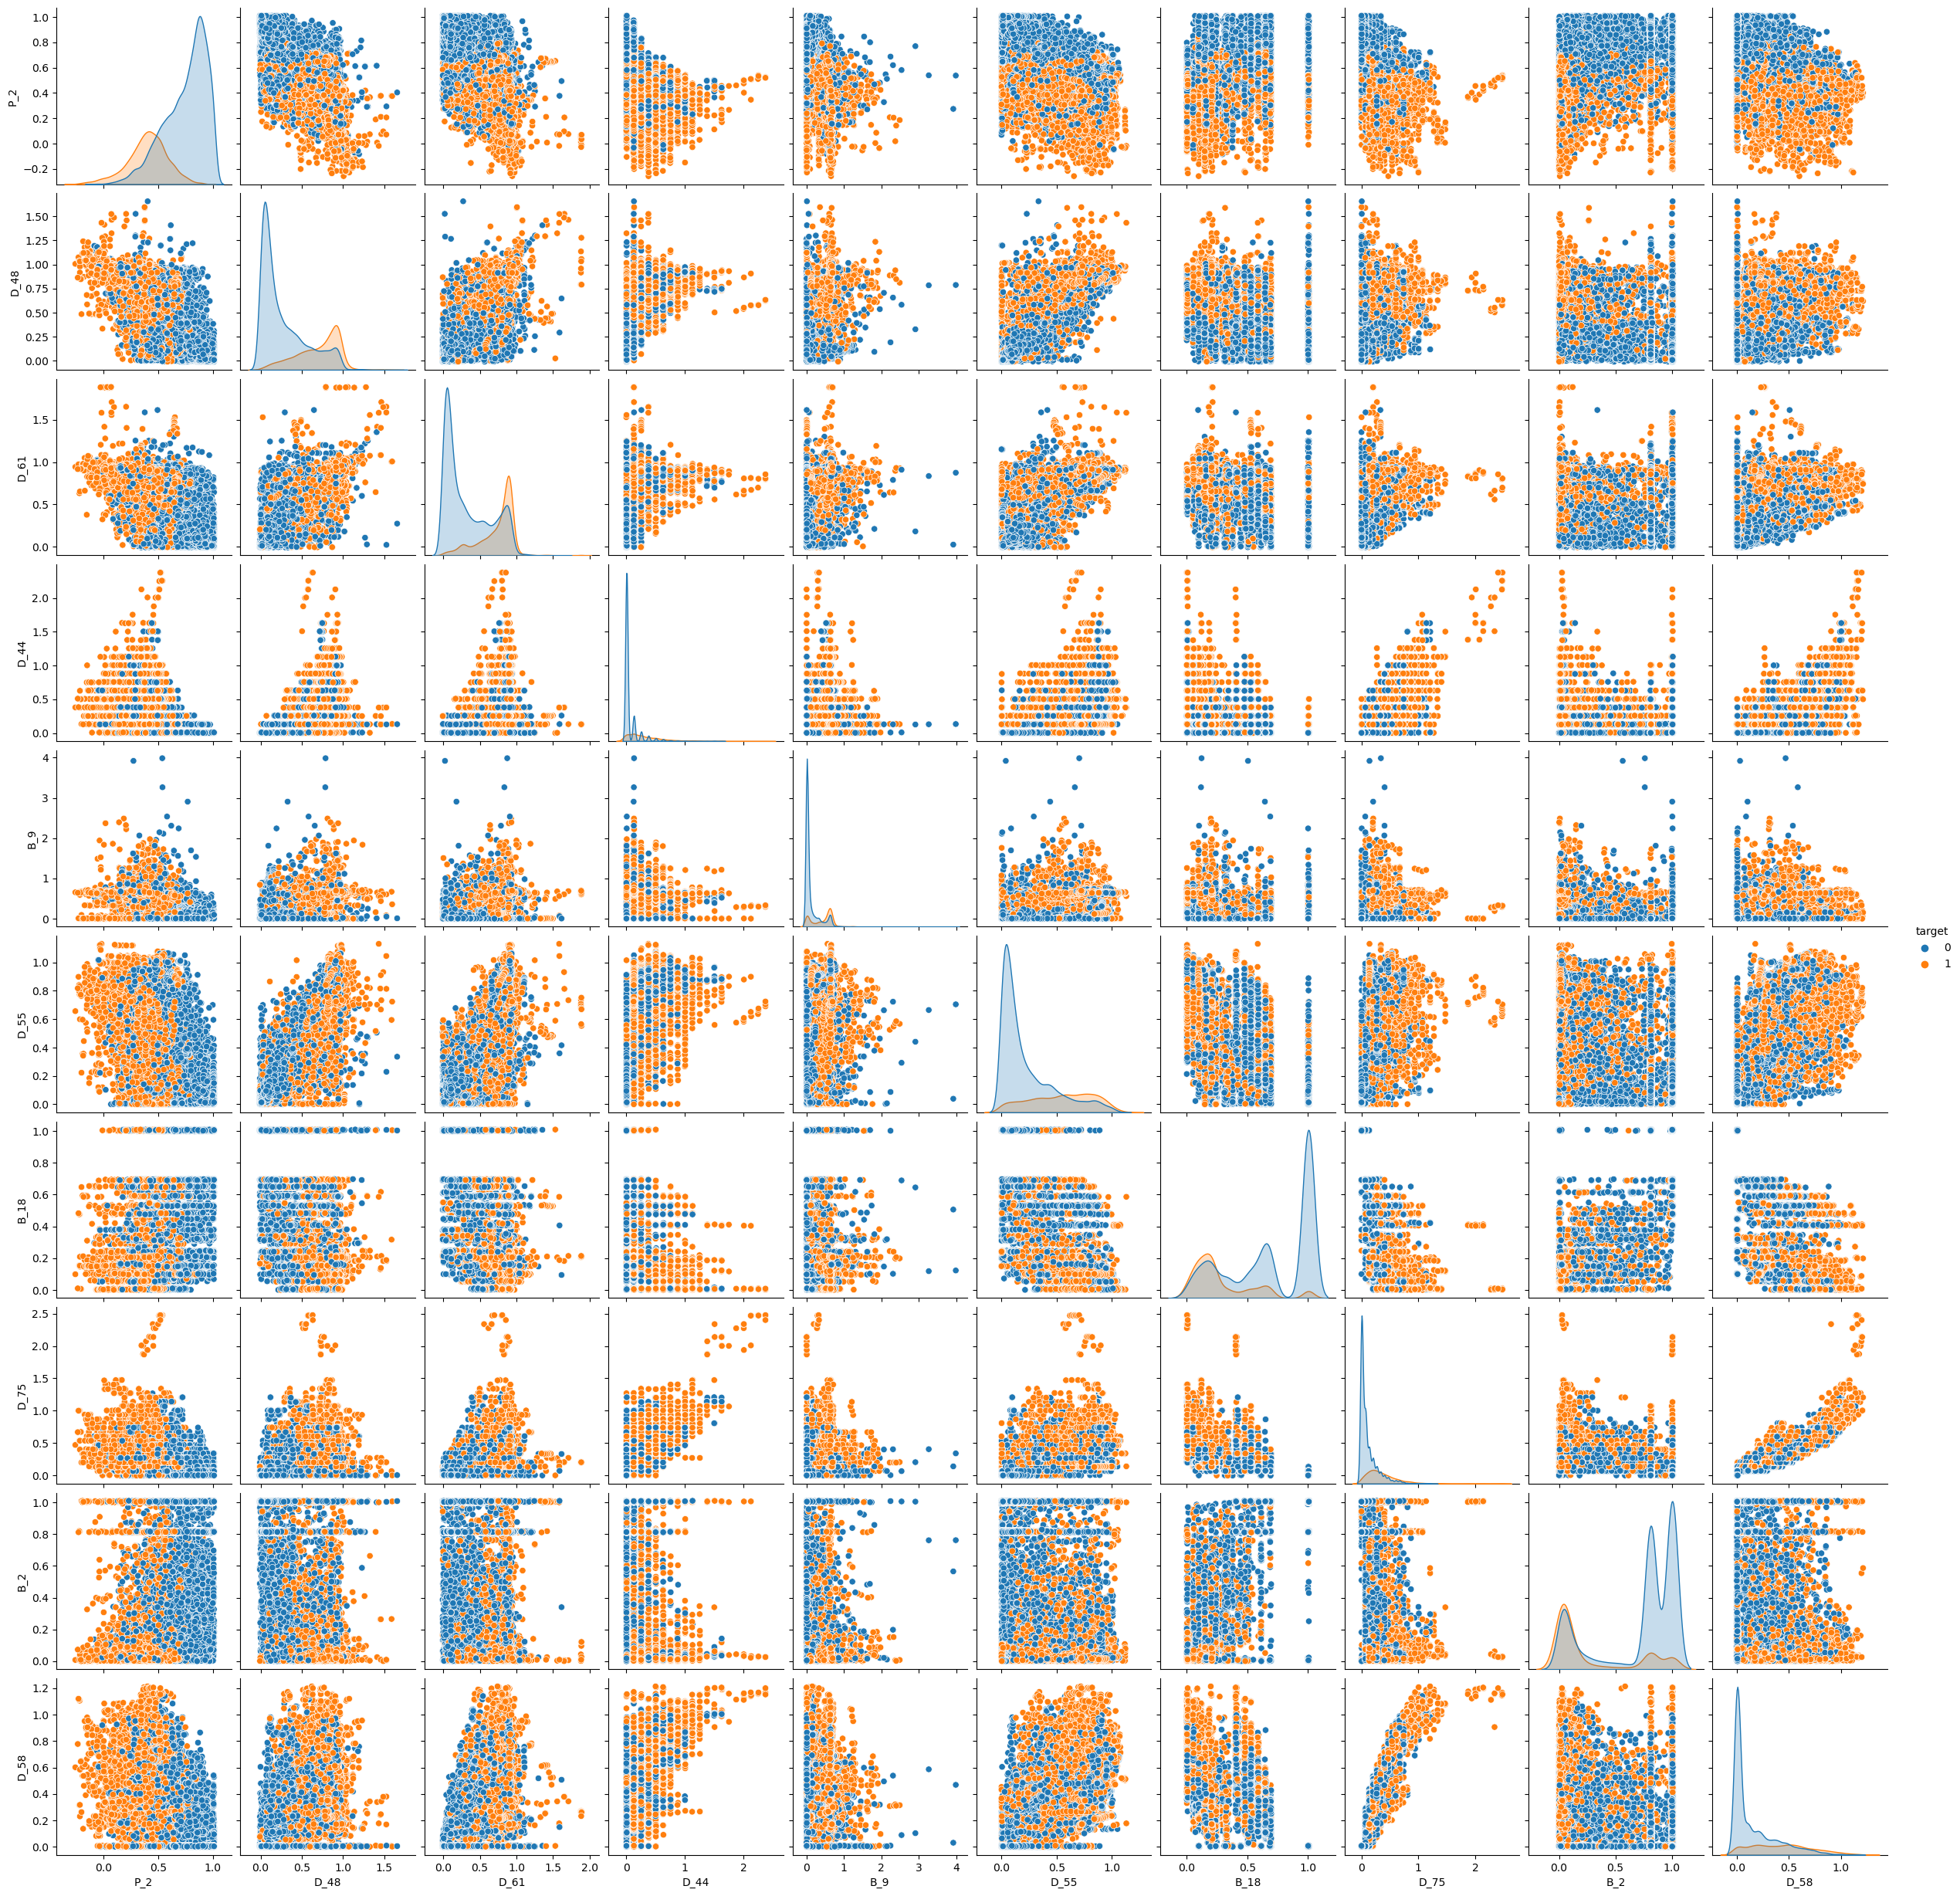

In [14]:
sns.pairplot(df[high_corr], hue='target')

In [15]:
mask = df.dtypes == object
mask['customer_ID'] = False
df_cat = df.columns[mask]
print(df_cat)

Index(['S_2', 'D_63', 'D_64'], dtype='object')


# Number of columns to create for One Hot Encoding

In [16]:
# Determine how many extra columns would be created
num_ohc_cols = (df[df_cat].apply(lambda x: x.nunique()).sort_values(ascending=False))

# No need to encode if there is only one value
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]

# Number of one-hot columns is one less than the number of categories
small_num_ohc_cols -= 1

small_num_ohc_cols.sum()

403

# One Hot Encoding and Label Encoding

In [17]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [18]:
# The encoders
le = LabelEncoder()
ohc = OneHotEncoder()
for col in num_ohc_cols.index:
    
    # Integer encode the string categories
    dat = le.fit_transform(df[col]).astype(int)
    
    # One hot encode the data--this returns a sparse array
    new_dat = ohc.fit_transform(dat.reshape(-1,1))

    # Create unique column names
    n_cols = new_dat.shape[1]
    col_names = ['_cat_'.join([col, str(x)]) for x in range(n_cols)]

    # Create the new dataframe
    new_df = pd.DataFrame(new_dat.toarray(), 
                          index=df.index, 
                          columns=col_names)
    
    # Append the new data to the dataframe
    df = pd.concat([df, new_df], axis=1)
    
    # Remove the original column from the dataframe
    df = df.drop(col, axis=1)

In [19]:
df.head().T

0  \
customer_ID  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...   
P_2                                                   0.938469   
D_39                                                  0.001733   
B_1                                                   0.008724   
B_2                                                   1.006838   
...                                                        ...   
D_64_cat_0                                                 0.0   
D_64_cat_1                                                 1.0   
D_64_cat_2                                                 0.0   
D_64_cat_3                                                 0.0   
D_64_cat_4                                                 0.0   

                                                             1  \
customer_ID  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...   
P_2                                                   0.936665   
D_39                                                  0.005775   
B_1                                                   0.004923   
B_2                                                   1.000653   
...                                                        ...   
D_64_cat_0                                                 0.0   
D_64_cat_1                                                 1.0   
D_64_cat_2                                                 0.0   
D_64_cat_3                                                 0.0   
D_64_cat_4                                                 0.0   

                                                             2  \
customer_ID  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...   
P_2                                                    0.95418   
D_39                                                  0.091505   
B_1                                                   0.021655   
B_2                                                   1.009672   
...                                                        ...   
D_64_cat_0                                                 0.0   
D_64_cat_1                                                 1.0   
D_64_cat_2                                                 0.0   
D_64_cat_3                                                 0.0   
D_64_cat_4                                                 0.0   

                                                             3  \
customer_ID  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...   
P_2                                                   0.960384   
D_39                                                  0.002455   
B_1                                                   0.013683   
B_2                                                     1.0027   
...                                                        ...   
D_64_cat_0                                                 0.0   
D_64_cat_1                                                 1.0   
D_64_cat_2                                                 0.0   
D_64_cat_3                                                 0.0   
D_64_cat_4                                                 0.0   

                                                             4  
customer_ID  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  
P_2                                                   0.947248  
D_39                                                  0.002483  
B_1                                                   0.015193  
B_2                                                   1.000727  
...                                                        ...  
D_64_cat_0                                                 0.0  
D_64_cat_1                                                 1.0  
D_64_cat_2                                                 0.0  
D_64_cat_3                                                 0.0  
D_64_cat_4                                                 0.0  

[572 rows x 5 columns]

# Filling up the NaN cells with mean values

In [20]:
for col in df.columns:
    if col in df_int or col in df_cols:
        mean_value = df[col].mean()
        print('Filling NAN of {} with mean value of {}'.format(col, mean_value))
        df[col].fillna(value=mean_value, inplace=True)

Filling NAN of P_2 with mean value of 0.6597912750755061
Filling NAN of D_39 with mean value of 0.15222257832929187
Filling NAN of B_1 with mean value of 0.12842649663514347
Filling NAN of B_2 with mean value of 0.6098291372160711
Filling NAN of R_1 with mean value of 0.07631383677584944
Filling NAN of S_3 with mean value of 0.2264236516958893
Filling NAN of D_41 with mean value of 0.06144383127199815
Filling NAN of B_3 with mean value of 0.139009188099959
Filling NAN of D_43 with mean value of 0.15574036787179987
Filling NAN of D_44 with mean value of 0.12374205776967206
Filling NAN of B_4 with mean value of 0.17963366056495092
Filling NAN of D_45 with mean value of 0.2587793705382291
Filling NAN of B_5 with mean value of 0.08598194918091695
Filling NAN of R_2 with mean value of 0.04433265013860604
Filling NAN of D_46 with mean value of 0.4746816890464209
Filling NAN of D_47 with mean value of 0.4189520043795902
Filling NAN of D_48 with mean value of 0.3859295482807024
Filling NAN of 

# Scaling the data using Min Max Scaler

In [21]:
from sklearn.preprocessing import MinMaxScaler

# Assigning the independent X and dependent y variables

In [22]:
X = df.drop(['customer_ID','target'], axis=1)
y=df['target']

# Scaling the independent variables

In [23]:
mm_scaler = MinMaxScaler()
X = pd.DataFrame(mm_scaler.fit_transform(X), columns=X.columns)

# Importing train test split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Plotting the count of the target variable

<Axes: >

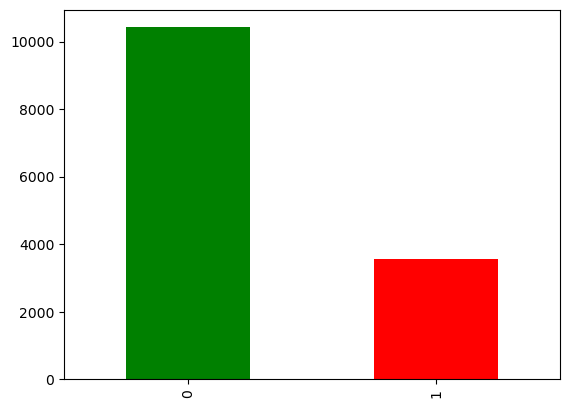

In [26]:
y_train.value_counts().plot.bar(color=['green', 'red'])

# Importing various metrics to assess out model


In [27]:
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix, precision_score, recall_score, roc_auc_score, f1_score,r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Logistic regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lr=LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [30]:
pred_lr=lr.predict(X_test)

In [31]:
cm_lr=confusion_matrix(y_test,pred_lr)
print("Confusion Matrix   :", cm_lr)
r2_lr=r2_score(y_test,pred_lr)
print("R Squared   :", r2_lr)
accuracy_lr = accuracy_score(y_test, pred_lr)
print("Accuracy   :", accuracy_lr)
precision_lr = precision_score(y_test, pred_lr)
print("Precision :", precision_lr)
recall_lr = recall_score(y_test, pred_lr)
print("Recall    :", recall_lr)
F1_score_lr = f1_score(y_test, pred_lr)
print("F1-score  :", F1_score_lr)

Confusion Matrix   : [[4152  317]
 [ 416 1115]]
R Squared   : 0.357209159433321
Accuracy   : 0.8778333333333334
Precision : 0.7786312849162011
Recall    : 0.728282168517309
F1-score  : 0.7526155923050962


In [32]:
result1 = ["1.","Logistic Regression"]
result1.append(round(r2_lr,2))
result1.append(round(accuracy_lr,2))
result1.append(round(precision_lr,2))
result1.append(round(recall_lr,2))
result1.append(round(F1_score_lr,2))
print(result1)

['1.', 'Logistic Regression', 0.36, 0.88, 0.78, 0.73, 0.75]


# Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1, max_features = "auto", class_weight="balanced", max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='auto',
                       max_leaf_nodes=30, n_estimators=1000, n_jobs=-1,
                       oob_score=True)

In [35]:
predict_rf = model_rf.predict(X_test)

In [36]:
cm_rf=confusion_matrix(y_test,predict_rf)
print("Confusion Matrix   :", cm_rf)
r2_rf=r2_score(y_test,pred_lr)
print("R Squared   :", r2_rf)
accuracy_rf = accuracy_score(y_test, predict_rf)
print("Accuracy   :", accuracy_rf)
precision_rf = precision_score(y_test, predict_rf)
print("Precision :", precision_rf)
recall_rf = recall_score(y_test, predict_rf)
print("Recall    :", recall_rf)
F1_score_rf = f1_score(y_test, predict_rf)
print("F1-score  :", F1_score_rf)

Confusion Matrix   : [[3685  784]
 [ 121 1410]]
R Squared   : 0.357209159433321
Accuracy   : 0.8491666666666666
Precision : 0.6426618049225159
Recall    : 0.9209666884389288
F1-score  : 0.7570469798657719


In [37]:
result2 = ["2.","Random Forest Classifier"]
result2.append(round(r2_rf,2))
result2.append(round(accuracy_rf,2))
result2.append(round(precision_rf,2))
result2.append(round(recall_rf,2))
result2.append(round(F1_score_rf,2))
print(result2)

['2.', 'Random Forest Classifier', 0.36, 0.85, 0.64, 0.92, 0.76]


# Support Vector Machine

In [38]:
from sklearn.svm import SVC

In [39]:
model_svm = SVC(kernel='linear')
model_svm.fit(X_train,y_train)
pred_svm = model_svm.predict(X_test)

In [40]:
cm_svm=confusion_matrix(y_test,pred_svm)
print("Confusion Matrix   :", cm_svm)
r2_svm=r2_score(y_test,pred_lr)
print("R Squared   :", r2_svm)
accuracy_svm = accuracy_score(y_test, pred_svm)
print("Accuracy   :", accuracy_svm)
precision_svm = precision_score(y_test, pred_svm)
print("Precision :", precision_svm)
recall_svm = recall_score(y_test, pred_svm)
print("Recall    :", recall_svm)
F1_score_svm = f1_score(y_test, pred_svm)
print("F1-score  :", F1_score_svm)

Confusion Matrix   : [[4134  335]
 [ 403 1128]]
R Squared   : 0.357209159433321
Accuracy   : 0.877
Precision : 0.7710184552289815
Recall    : 0.736773350751143
F1-score  : 0.753507014028056


In [41]:
result3 = ["3.","Support Vector Machine"]
result3.append(round(r2_svm,2))
result3.append(round(accuracy_svm,2))
result3.append(round(precision_svm,2))
result3.append(round(recall_svm,2))
result3.append(round(F1_score_svm,2))
print(result3)

['3.', 'Support Vector Machine', 0.36, 0.88, 0.77, 0.74, 0.75]


# Extreme Gradient Boosting (XG Boost)

In [42]:
from xgboost import XGBClassifier

In [43]:
model_xg = XGBClassifier()
model_xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [44]:
pred_xg = model_xg.predict(X_test)

In [45]:
cm_xg=confusion_matrix(y_test,pred_xg)
print("Confusion Matrix   :", cm_xg)
r2_xg=r2_score(y_test,pred_lr)
print("R Squared   :", r2_xg)
accuracy_xg = accuracy_score(y_test, pred_xg)
print("Accuracy   :", accuracy_xg)
precision_xg = precision_score(y_test, pred_xg)
print("Precision :", precision_xg)
recall_xg = recall_score(y_test, pred_xg)
print("Recall    :", recall_xg)
F1_score_xg = f1_score(y_test, pred_xg)
print("F1-score  :", F1_score_xg)

Confusion Matrix   : [[4403   66]
 [  79 1452]]
R Squared   : 0.357209159433321
Accuracy   : 0.9758333333333333
Precision : 0.9565217391304348
Recall    : 0.9483997387328543
F1-score  : 0.9524434240734667


In [46]:
result4 = ["4.","Extreme Gradient Boosting"]
result4.append(round(r2_xg,2))
result4.append(round(accuracy_xg,2))
result4.append(round(precision_xg,2))
result4.append(round(recall_xg,2))
result4.append(round(F1_score_xg,2))
print(result4)

['4.', 'Extreme Gradient Boosting', 0.36, 0.98, 0.96, 0.95, 0.95]


# Result Table of all Models

In [47]:
from prettytable import PrettyTable

In [48]:
Result_table = PrettyTable(["S.No.","Model","R Squared Score","Accuracy","Precison","Recall","F1 Score"])
Result_table.add_row(result1)
Result_table.add_row(result2)
Result_table.add_row(result3)
Result_table.add_row(result4)
print(Result_table)

+-------+---------------------------+-----------------+----------+----------+--------+----------+
| S.No. |           Model           | R Squared Score | Accuracy | Precison | Recall | F1 Score |
+-------+---------------------------+-----------------+----------+----------+--------+----------+
|   1.  |    Logistic Regression    |       0.36      |   0.88   |   0.78   |  0.73  |   0.75   |
|   2.  |  Random Forest Classifier |       0.36      |   0.85   |   0.64   |  0.92  |   0.76   |
|   3.  |   Support Vector Machine  |       0.36      |   0.88   |   0.77   |  0.74  |   0.75   |
|   4.  | Extreme Gradient Boosting |       0.36      |   0.98   |   0.96   |  0.95  |   0.95   |
+-------+---------------------------+-----------------+----------+----------+--------+----------+


In [49]:
result = pd.DataFrame(y_test, pred_xg)
result.T

0    0   1   1    0    0   1    0    0    0  ...    0    0   1   1  \
target  0.0  0.0 NaN NaN  0.0  0.0 NaN  0.0  0.0  0.0  ...  0.0  0.0 NaN NaN   

          0    0    0    0    0    0  
target  0.0  0.0  0.0  0.0  0.0  0.0  

[1 rows x 6000 columns]

# Conclusion

By this we have been able to detect fraudulent transactions. We have seen that Extreme Gradient Boosting (XG Boost) has been so far the best model in form of metrics to be able to classify our models.

XG Boost has an accuracy of 97% showing that we can identify 97% of the transactions as whether its fraudulent or not with 94% recall showing the True Positives which is backed by a high F1 score of 94%.

Thus we have been able to build a model which suits the business needs and diminishes error.